In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip show matplotlib

Name: matplotlib
Version: 3.1.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.6/dist-packages
Requires: pyparsing, numpy, kiwisolver, python-dateutil, cycler
Required-by: yellowbrick, stable-baselines, seaborn, scikit-image, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, magenta, keras-vis, imgaug, fbprophet, fastai, descartes, daft


In [3]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 67kB/s 
     |████████████████████████████████| 204kB 70.4MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=0b037a0c9d01852a3c0393b0793de5d36c1d756b630fcdc7b3722f6c30029562
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null 
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java 
!java -version


update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_222"
OpenJDK Runtime Environment (build 1.8.0_222-8u222-b10-1ubuntu1~18.04.1-b10)
OpenJDK 64-Bit Server VM (build 25.222-b10, mixed mode)


In [0]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local").setAppName("My App") 
sc = SparkContext(conf = conf)


In [0]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np
from nltk.classify import maxent

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [0]:
nba_df = pd.read_csv('/content/drive/My Drive/nba.csv')

In [8]:
nba_df.head(2)
#nba_df.loc[nba_df['Team']=='Sacramento Kings*'].index[0]

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Phoenix Suns*,82,19780,3351,7018,0.477,796,2026,0.393,2555,4992,0.512,1556,2080,0.748,967,2652,3619,1927,572,453,1125,1563,9054
1,2,Sacramento Kings*,82,19855,3203,6978,0.459,522,1396,0.374,2681,5582,0.480,1577,2004,0.787,1023,2455,3478,2005,674,316,1073,1685,8505


In [9]:
nba_df.mean()

Rk        15.500000
G         82.000000
MP     19833.333333
FG      2947.833333
FGA     6587.533333
FG%        0.447433
3P       459.233333
3PA     1291.600000
3P%        0.353167
2P      2488.600000
2PA     5295.933333
2P%        0.470067
FT      1615.400000
FTA     2136.500000
FT%        0.756500
ORB      984.800000
DRB     2447.533333
TRB     3432.333333
AST     1744.733333
STL      616.300000
BLK      398.766667
TOV     1189.233333
PF      1855.700000
PTS     7970.300000
dtype: float64

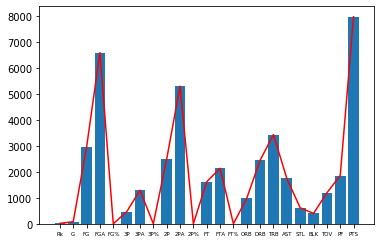

In [10]:
x_axis = nba_df.columns
y_axis = nba_df.mean()


x_axis = (x_axis.to_list())
x_axis.remove('Team')
x_axis.remove('MP')


y_axis = y_axis.to_list()
del y_axis[2]
plt.plot(x_axis,y_axis,color = 'r')
plt.bar(x_axis,y_axis)
plt.tick_params(axis='x', which='major', labelsize=5.5)
plt.savefig('feature_mean.png')
plt.show()



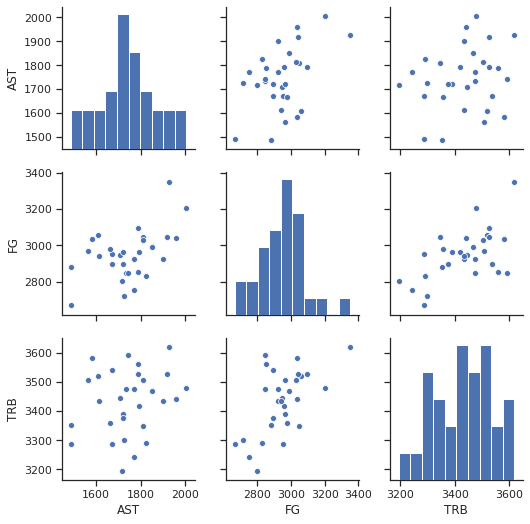

In [11]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(nba_df[["AST", "FG", "TRB"]])
plt.show()

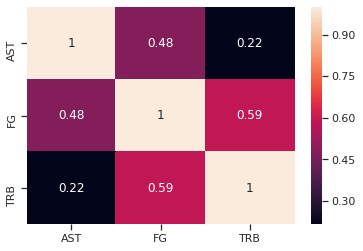

In [12]:
correlation = nba_df[["AST", "FG", "TRB"]].corr()
sns.heatmap(correlation, annot=True)

In [0]:
season_matches_df = pd.read_csv('/content/drive/My Drive/season.csv')

In [14]:
season_matches_df.head(5)

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Tue Nov 2 2004,8:00p,Houston Rockets,79,Detroit Pistons,87,Box Score,NaN,22076,NaN
1,Tue Nov 2 2004,8:30p,Sacramento Kings,98,Dallas Mavericks,107,Box Score,NaN,20041,NaN
2,Tue Nov 2 2004,10:30p,Denver Nuggets,78,Los Angeles Lakers,89,Box Score,NaN,18997,NaN
3,Wed Nov 3 2004,7:00p,Indiana Pacers,109,Cleveland Cavaliers,104,Box Score,2OT,19730,NaN
4,Wed Nov 3 2004,7:00p,Milwaukee Bucks,92,Orlando Magic,93,Box Score,NaN,15138,NaN


In [0]:
playoff_matches_df = pd.read_csv('/content/drive/My Drive/playoffs.csv')

In [0]:
nba_df_per_minute = nba_df.drop(columns=['Rk', 'FG%','3P%', '2P%', 'FT%'])
nba_df_per_minute['TOV'] = -nba_df_per_minute['TOV']
nba_df_per_minute['PF'] = -nba_df_per_minute['PF']
nba_df_per_minute['Team'] = nba_df_per_minute['Team'].map(lambda x : x.replace("*", ""))

In [17]:
def add_winner(row):
  if (row['PTS'] > row['PTS.1']):
    return 1
  return 2
  
team1_vs_team2 = season_matches_df[['Visitor/Neutral', 'Home/Neutral' ]] 
team1_vs_team2.columns = ['team1','team2']
team1_vs_team2['winner'] = season_matches_df.apply (lambda row: add_winner(row), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
def create_column(column_name, row):
  team1_row = nba_df_per_minute.loc[nba_df_per_minute['Team'] == row['team1']]
  team2_row = nba_df_per_minute.loc[nba_df_per_minute['Team'] == row['team2']]
  return team1_row[column_name].tolist()[0] - team2_row[column_name].tolist()[0]

for columnname in nba_df_per_minute.columns[3:]:
  team1_vs_team2[columnname] = team1_vs_team2.apply(lambda row: create_column(columnname, row), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
X = team1_vs_team2.loc[:,'FG':]
X=(X-X.min())/(X.max()-X.min())
y = team1_vs_team2['winner']

In [0]:
X_cov_matrix = X.cov()
eigen_values, eigen_vectors = np.linalg.eig(X_cov_matrix)


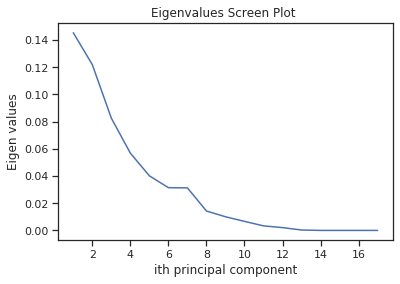

In [21]:
comps = [ i + 1 for i in range(len(eigen_values))] 
var = eigen_values
# plotting the points 
plt.plot(comps, var) 

plt.xlabel('ith principal component') 
plt.ylabel('Eigen values') 

# # giving a title to my graph 
plt.title('Eigenvalues Screen Plot ') 

# # function to show the plot 
plt.show() 

In [0]:
X = X.dot(eigen_vectors[:,:8])

In [23]:
clf = LogisticRegression().fit(X, y)
# preds = clf.predict(X)
# print(preds)
# print(classification_report(y, preds))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X,y)
# preds = nb.predict(X)
# print(preds)
# print(classification_report(y, preds))


GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=45, max_depth=2, random_state=0)
rfc.fit(X,y)
# preds = rfc.predict(X)
# print(preds)
# print(classification_report(y, preds))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
abc = AdaBoostClassifier(n_estimators=25, learning_rate=0.1)
abc.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=25, random_state=None)

In [27]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=3)
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Preparing Data for feeding to NBAME model

> The data is fed as a list.

> Each entry of the list of a dictionary of features (X) and the corresponding label


In [28]:
Y = team1_vs_team2['winner']

print('Y')
print(Y.head(5))

train_data = []

for index, row in X.iterrows():
  d = dict(row)
  train_data.append([d, y[index]])

print('\nTrain data for NBAME model')
print(train_data[:3])

Y
0    2
1    2
2    2
3    1
4    2
Name: winner, dtype: int64

Train data for NBAME model
[[{0: 0.6471458807414748, 1: 1.5477544013119335, 2: 0.45838471335291026, 3: 0.32018910660240774, 4: 0.2718598005012266, 5: -0.25527904926197775, 6: 0.2404897736327323, 7: 0.021069008971138944}, 2], [{0: 1.1197713500705095, 1: 1.568313884763953, 2: -0.07707489927387205, 3: 0.4797642026770912, 4: 0.4101594661048585, 5: -0.32906592422533154, 6: 0.12369789955988696, 7: 0.14343881925616114}, 2], [{0: 1.7698375436374598, 1: 1.1649098789441412, 2: 0.5207094009673303, 3: 0.175373864307707, 4: 0.5169059888330668, 5: -0.6682566678752202, 6: 0.3871575667302233, 7: -0.024243354439690085}, 2]]


## Building the NBAME Classifier

In [0]:
nbame_classifier = maxent.MaxentClassifier.train(train_data, algorithm='GIS', trace=0, max_iter=1000)

In [30]:
#Test data
playoff_matches_df.columns = season_matches_df.columns

team1_vs_team2_test = playoff_matches_df[['Visitor/Neutral', 'Home/Neutral' ]] 
team1_vs_team2_test.columns = ['team1','team2']
team1_vs_team2_test['winner'] = playoff_matches_df.apply (lambda row: add_winner(row), axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
res = defaultdict(int)
def convert_to_dict(row):
    res[(row['team1'], row['team2'])] += 1 if row['winner'] == 1 else -1

team1_vs_team2_test.apply(lambda row: convert_to_dict(row), axis = 1)
final_res = defaultdict()
removedkeys=set()
for key, value in res.items():
  if key not in removedkeys:
    final_res[(key[0], key[1])] = value - res[(key[1], key[0])]
    removedkeys.add((key[1], key[0]))
  

In [0]:
team1_vs_team2_res = pd.DataFrame(columns = team1_vs_team2_test.columns)
for key, value in final_res.items():
  team1_vs_team2_res = team1_vs_team2_res.append({'team1': key[0], 'team2': key[1], 'winner': 1 if value > 0 else 2}, ignore_index=True)

In [0]:
for columnname in nba_df_per_minute.columns[3:]:
  team1_vs_team2_res[columnname] = team1_vs_team2_res.apply(lambda row: create_column(columnname, row), axis=1)

In [0]:
team1_vs_team2_res['winner'] = pd.to_numeric(team1_vs_team2_res['winner'])
X_test = team1_vs_team2_res.loc[:,'FG':]

X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())
y_test = team1_vs_team2_res['winner']

X_test = X_test.dot(eigen_vectors[:,:8])

In [35]:
preds_test=clf.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 1 1 2 1 2 2 2 2 2 1 2 2 2 2]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.82      0.82      0.82        11

    accuracy                           0.73        15
   macro avg       0.66      0.66      0.66        15
weighted avg       0.73      0.73      0.73        15



In [36]:
preds_test=rfc.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 1 1 2 1 2 2 2 2 2 2 1 2 2 2]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.82      0.82      0.82        11

    accuracy                           0.73        15
   macro avg       0.66      0.66      0.66        15
weighted avg       0.73      0.73      0.73        15



In [37]:
preds_test=nb.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 1 1 2 1 2 2 2 2 2 1 1 2 2 2]
              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       0.80      0.73      0.76        11

    accuracy                           0.67        15
   macro avg       0.60      0.61      0.60        15
weighted avg       0.69      0.67      0.68        15



In [38]:
preds_test=dtc.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 2 2 2 1 2 2 2 1 2 2 1 2 2 2]
              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       0.75      0.82      0.78        11

    accuracy                           0.67        15
   macro avg       0.54      0.53      0.53        15
weighted avg       0.64      0.67      0.65        15



In [39]:
preds_test=abc.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 1 2 2 1 2 2 2 2 2 2 2 2 2 1]
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.83      0.91      0.87        11

    accuracy                           0.80        15
   macro avg       0.75      0.70      0.72        15
weighted avg       0.79      0.80      0.79        15



## Results of the NBAME Model

In [40]:
# Prepare the test data for prediction
X_test_list = []
for index, row in X_test.iterrows():
  d = dict(row)
  X_test_list.append(d)

print(len(X_test_list))

y_predicted = []
for featureset in X_test_list:
  pdist = nbame_classifier.prob_classify(featureset)
  if pdist.prob(1) > 0.5:
    y_predicted.append(1)
  else:
    y_predicted.append(2)

print(y_predicted)
print(classification_report(y_test, y_predicted))

15
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.73      1.00      0.85        11

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:

transformed = team1_vs_team2[['team1','team2','winner']]
transformed.loc[0,:]



team1     Houston Rockets
team2     Detroit Pistons
winner                  2
Name: 0, dtype: object

In [42]:
from sklearn.model_selection import train_test_split
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel

transformed = team1_vs_team2[['team1','team2','winner']]
t = list()

for ind, row in transformed.iterrows():
  t.append((nba_df_per_minute.loc[nba_df_per_minute['Team']==row[0]].index[0],\
            nba_df_per_minute.loc[nba_df_per_minute['Team']==row[1]].index[0],float(row[2])))
  
t_1 = sc.parallelize(t)
t_2 = t_1.collect()
t_1


ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195

In [43]:
from pyspark.ml.evaluation import RegressionEvaluator

seed = 0
# trainData, validationData, testData = t_1.randomSplit([0.80, 0.20],0)
rank = 2
numIterations = 10
model = ALS.train(t_1, rank , numIterations)

predictions = t_1.map(lambda x:(x[0],x[1]))
test1 = model.predictAll(predictions)
print(test1.collect())



[Rating(user=19, product=13, rating=1.4446138817754157), Rating(user=19, product=15, rating=1.5359300384885763), Rating(user=19, product=15, rating=1.5359300384885763), Rating(user=19, product=4, rating=1.1686267387214855), Rating(user=19, product=21, rating=1.1677906565519276), Rating(user=19, product=16, rating=1.337267390479635), Rating(user=19, product=22, rating=1.5606968560782466), Rating(user=19, product=22, rating=1.5606968560782466), Rating(user=19, product=25, rating=1.552713248685329), Rating(user=19, product=25, rating=1.552713248685329), Rating(user=19, product=28, rating=1.34373234024536), Rating(user=19, product=29, rating=1.0082180328571262), Rating(user=19, product=29, rating=1.0082180328571262), Rating(user=19, product=11, rating=1.0466648248598034), Rating(user=19, product=11, rating=1.0466648248598034), Rating(user=19, product=14, rating=1.423265256641093), Rating(user=19, product=27, rating=1.1277114088072677), Rating(user=19, product=0, rating=1.3688457000251475),

In [44]:
transform = test1.map(lambda x: (x.user,x.product, 2 if x.rating > 1 else 1))
score = 0
for row in transform.collect():
  team1 = nba_df_per_minute.iloc[row[0]]['Team']
  team2 = nba_df_per_minute.iloc[row[1]]['Team']
  winner = team1_vs_team2.loc[(team1_vs_team2['team1']== team1) & (team1_vs_team2['team2']== team2)]
  score += 1 if winner.iloc[0]['winner'] == row[2] else 0 

print(score,transform.count())
score/transform.count()

755 1230


0.6138211382113821

In [45]:
test_for_als_df = team1_vs_team2_res[['team1','team2','winner']]
test_for_als_df.loc[0,:]


test_for_als = list()

for ind, row in test_for_als_df.iterrows():
  # print(row[0])
  # print(nba_df_per_minute.loc[nba_df_per_minute['Team']==row[0]].index[0])
  # , nba_df.loc[nba_df['Team']==row[1]].index[0],float(row[2]))
  test_for_als.append((nba_df_per_minute.loc[nba_df_per_minute['Team']==row[0]].index[0],\
            nba_df_per_minute.loc[nba_df_per_minute['Team']==row[1]].index[0],float(row[2])))
  
test_for_als_rdd = sc.parallelize(test_for_als)


test_for_als_rdd = test_for_als_rdd.map(lambda x:(x[0],x[1]))
preds_als_rdd = model.predictAll(test_for_als_rdd)
print(preds_als_rdd.collect())

[Rating(user=19, product=2, rating=1.3164124660328156), Rating(user=22, product=0, rating=1.6628841660973421), Rating(user=28, product=3, rating=1.8341599651507074), Rating(user=24, product=4, rating=1.8112624059068096), Rating(user=24, product=23, rating=1.2187311290536158), Rating(user=23, product=17, rating=1.7751001392232872), Rating(user=23, product=3, rating=1.7641218731703452), Rating(user=1, product=10, rating=1.4918588419840866), Rating(user=17, product=0, rating=1.457758147825114), Rating(user=7, product=17, rating=1.80200880302354), Rating(user=9, product=23, rating=1.9164799118617353), Rating(user=10, product=17, rating=1.584780115236839), Rating(user=5, product=3, rating=1.7828672130410022), Rating(user=5, product=20, rating=1.6745124707835544), Rating(user=2, product=0, rating=1.4273945576666875)]


In [46]:
transformed_test = preds_als_rdd.map(lambda x: (x.user,x.product, 2 if x.rating > 1.5 else 1))
score = 0
preds_als = list()
for row in transformed_test.collect():
  team1 = nba_df_per_minute.iloc[row[0]]['Team']
  team2 = nba_df_per_minute.iloc[row[1]]['Team']
  winner = team1_vs_team2.loc[(team1_vs_team2['team1']== team1) & (team1_vs_team2['team2']== team2)]
  score += 1 if winner.iloc[0]['winner'] == row[2] else 0
  preds_als.append(row[2]) 

print(score,transformed_test.count())
score/transformed_test.count()

10 15


0.6666666666666666

In [47]:

transformed = team1_vs_team2[['team1','team2','winner']]
print(transformed['winner'])
transformed['winner'] = np.where(transformed['winner'] == 1, 2, 1)
print(transformed['winner'])

0       2
1       2
2       2
3       1
4       2
       ..
1225    1
1226    2
1227    2
1228    2
1229    2
Name: winner, Length: 1230, dtype: int64
0       1
1       1
2       1
3       2
4       1
       ..
1225    2
1226    1
1227    1
1228    1
1229    1
Name: winner, Length: 1230, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
print(classification_report(preds_als, y_test))

              precision    recall  f1-score   support

           1       0.25      0.20      0.22         5
           2       0.64      0.70      0.67        10

    accuracy                           0.53        15
   macro avg       0.44      0.45      0.44        15
weighted avg       0.51      0.53      0.52        15



In [49]:
print(team1_vs_team2_res)

                  team1                team2  winner   FG  ...  BLK  TOV   PF   PTS
0       Houston Rockets     Dallas Mavericks       2 -212  ...  -83  -33   20  -609
1        Indiana Pacers       Boston Celtics       1 -378  ...  -66  124  110  -678
2      Sacramento Kings  Seattle SuperSonics       2  321  ...  -22   40  259   392
3       New Jersey Nets           Miami Heat       2 -344  ... -166  -37 -171  -831
4    Washington Wizards        Chicago Bulls       1  117  ...  -22  199  221   496
5        Denver Nuggets    San Antonio Spurs       2  115  ...  -54  -98 -161   273
6     Memphis Grizzlies         Phoenix Suns       2 -549  ...   23  -72 -347 -1393
7    Philadelphia 76ers      Detroit Pistons       2   95  ... -176 -141 -240   475
8    Washington Wizards           Miami Heat       2 -131  ... -127  -45    7   -86
9   Seattle SuperSonics    San Antonio Spurs       2  -41  ... -205   13 -227   225
10       Indiana Pacers      Detroit Pistons       2 -183  ... -140  -40 -25

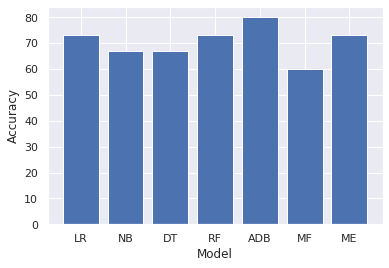

In [50]:
import matplotlib.pyplot as plt 
sns.set()
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7] 

# heights of bars 
height = [73, 67, 67, 73, 80, 60, 73] 

# labels for bars 
tick_label = ['LR', 'NB', 'DT', 'RF', 'ADB', 'MF','ME'] 

# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
		width = 0.8) 

# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
# plt.title('Performance chart!') 

# function to show the plot 
plt.show() 
